In [ ]:
conda install -c conda-forge imbalanced-learn=0.8.1

In [10]:
## importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

# Loading the dataset
data = pd.read_csv("C:\\Users\\priya\\Desktop\\DataScience\\CreditCard\\creditcard.csv")

In [11]:
## Exploratory Data Analysis

# Display information about the dataset
print(data.info())

# Display descriptive statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
# Data Cleaning
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
## Balancing DAta 
X = data.drop('Class', axis=1)
y = data['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [14]:
# Handling imbalanced data using synthetic oversampling
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = data[data['Class'] == 0]
minority_class = data[data['Class'] == 1]

# Upsample the minority class using synthetic samples
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the majority class with the upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])

# Shuffle the dataset
data_upsampled = data_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target variable
X_resampled = data_upsampled.drop('Class', axis=1)
y_resampled = data_upsampled['Class']

In [16]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [18]:
# Identify and exclude datetime columns
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns
X_train = X_train.drop(columns=datetime_columns)
X_test = X_test.drop(columns=datetime_columns)

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Check data types
print(X_test.dtypes)

# Check for missing values
print(X_test.isnull().sum())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


In [20]:
# Make predictions on the test set
proba = model.predict_proba(X_test)

# Convert list to NumPy array
proba_array = np.array(proba)

# Perform the argmax operation
y_pred = np.argmax(proba_array, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9999736208079067
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57219
           1       1.00      1.00      1.00     56507

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[57216     3]
 [    0 56507]]


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=50000) 

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LogisticRegression(solver='saga', max_iter=50000)

model = LogisticRegression(solver='saga', max_iter=50000, C=0.1)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
data = pd.read_csv("C:\\Users\\priya\\Desktop\\DataScience\\CreditCard\\creditcard.csv")
# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instantiate the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9990344440153085
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.72      0.72        98

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56836    28]
 [   27    71]]


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv("C:\\Users\\priya\\Desktop\\DataScience\\CreditCard\\creditcard.csv")

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instantiate and fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Accessing feature importances after fitting
feature_importances = model.coef_[0]

In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(max_iter=50000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Access the best hyperparameters
best_params = grid_search.best_params_

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=50000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [28]:
# Access the best hyperparameters
best_params = grid_search.best_params_

# Access the best estimator (model)
best_model = grid_search.best_estimator_

In [29]:
# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9979635546504687
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.05      0.01      0.02        98

    accuracy                           1.00     56962
   macro avg       0.52      0.50      0.51     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56845    19]
 [   97     1]]


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [2]:
from imblearn.over_sampling import SMOTE

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\priya\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model on the resampled data
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [32]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., to 0.3)
y_pred_adjusted = (y_prob > 0.3).astype(int)

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Precision: 0.9702970297029703, Recall: 1.0, F1-Score: 0.9849246231155778


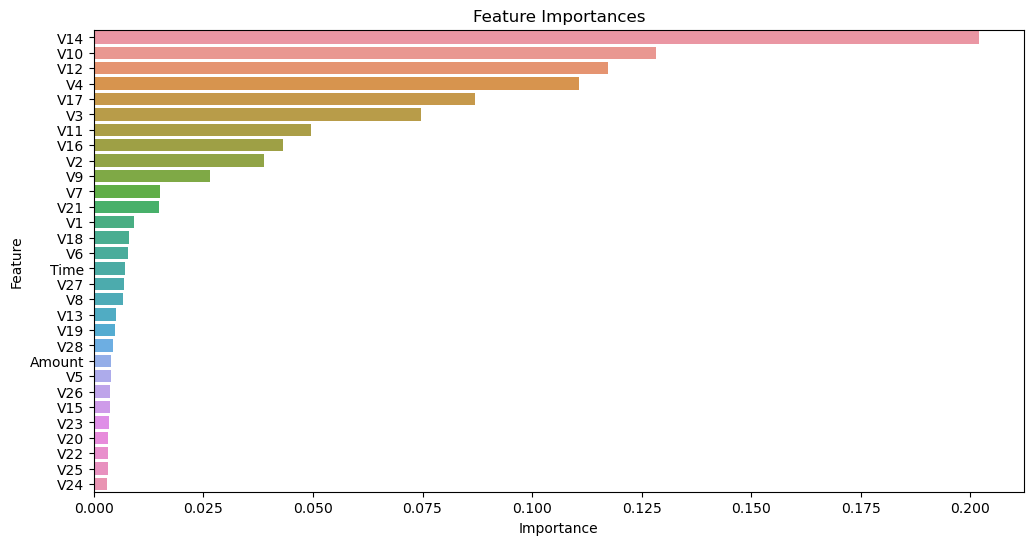

In [38]:
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

Top 10 Features:
   Feature  Importance
17     V17    0.170325
14     V14    0.136363
12     V12    0.133326
10     V10    0.074073
16     V16    0.071792
11     V11    0.045277
9       V9    0.031127
4       V4    0.030496
18     V18    0.028156
7       V7    0.024627


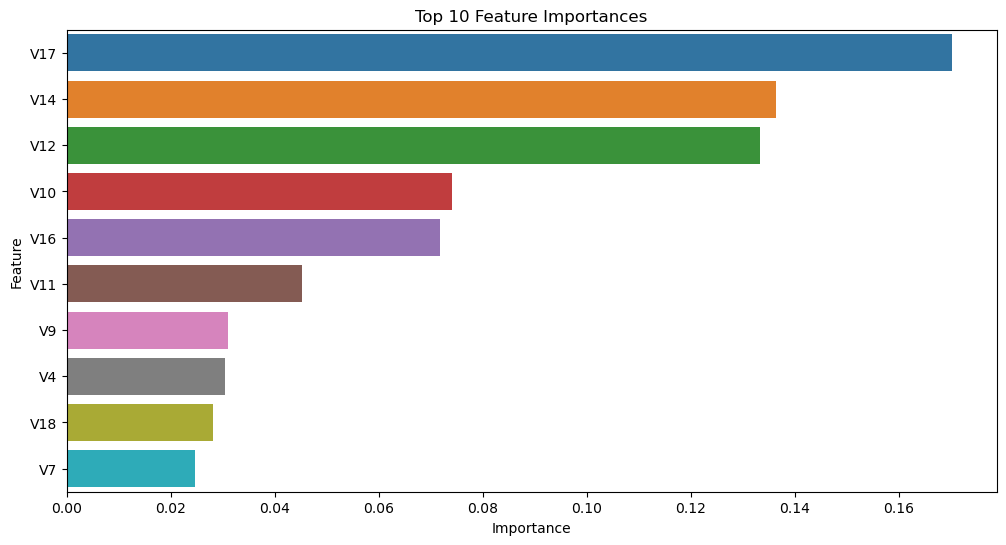

In [34]:
model.fit(X_train, y_train) 
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_n = 10
top_features = feature_importance_df.head(top_n)

print("Top {} Features:".format(top_n))
print(top_features)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
print(data['V14'].describe())
print(data['V10'].describe())
print(data['V12'].describe())
print(data['V4'].describe())
print(data['V17'].describe())

count    2.848070e+05
mean    -1.474791e-13
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64
count    2.848070e+05
mean     7.092545e-13
std      1.088850e+00
min     -2.458826e+01
25%     -5.354257e-01
50%     -9.291738e-02
75%      4.539234e-01
max      2.374514e+01
Name: V10, dtype: float64
count    2.848070e+05
mean     1.053347e-12
std      9.992014e-01
min     -1.868371e+01
25%     -4.055715e-01
50%      1.400326e-01
75%      6.182380e-01
max      7.848392e+00
Name: V12, dtype: float64
count    2.848070e+05
mean     8.321385e-13
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%      7.433413e-01
max      1.687534e+01
Name: V4, dtype: float64
count    2.848070e+05
mean    -6.425436e-13
std      8.493371e-01
min     -2.516280e+01
25%     -4.837483e-01
50%     -6.567575e-02
75%      3.996750e-01
max      9.253526e+00
Name: V17, dtype:

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

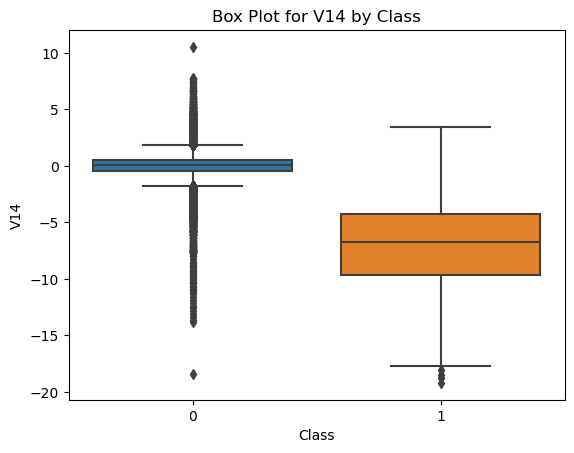

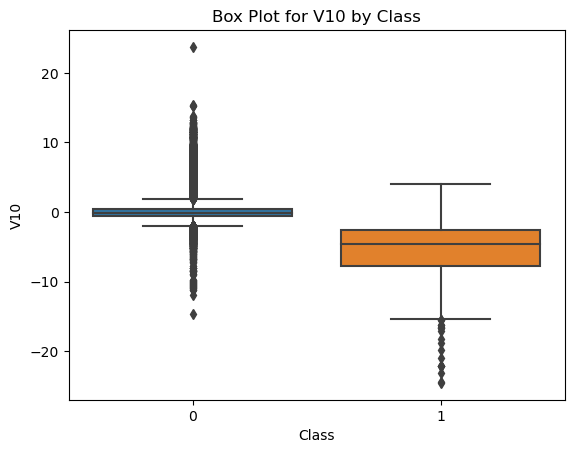

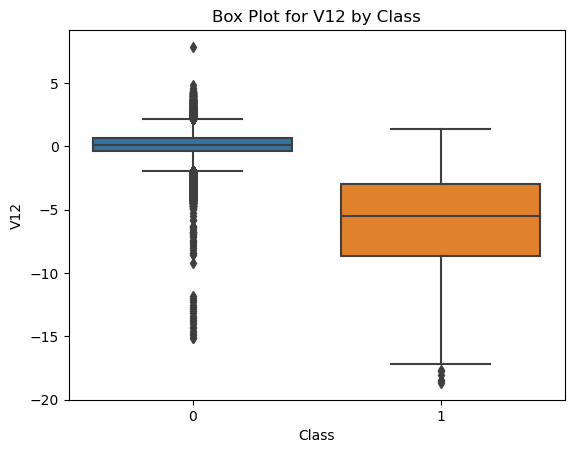

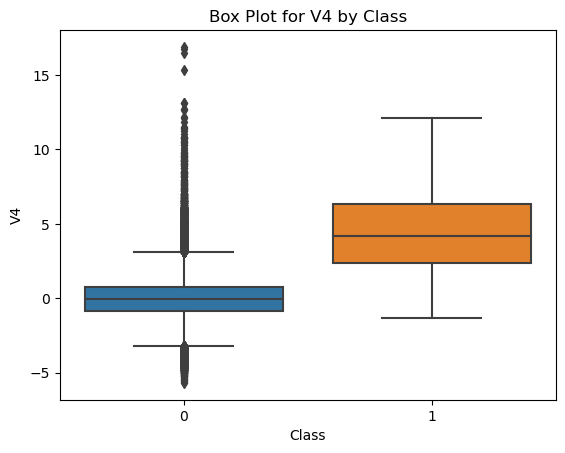

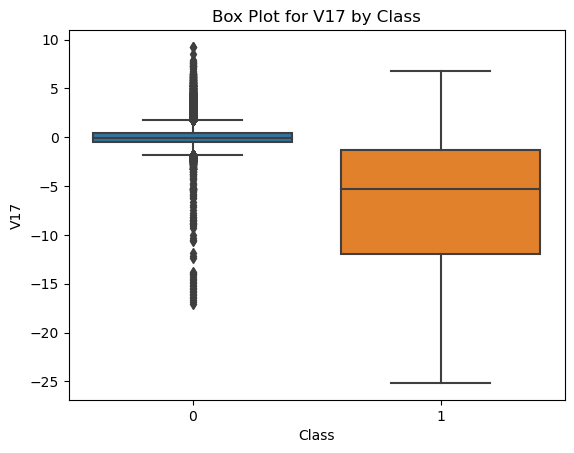

In [45]:
sns.boxplot(x='Class', y='V14', data=data)
plt.title('Box Plot for V14 by Class')
plt.show()

sns.boxplot(x='Class', y='V10', data=data)
plt.title('Box Plot for V10 by Class')
plt.show()

sns.boxplot(x='Class', y='V12', data=data)
plt.title('Box Plot for V12 by Class')
plt.show()

sns.boxplot(x='Class', y='V4', data=data)
plt.title('Box Plot for V4 by Class')
plt.show()

sns.boxplot(x='Class', y='V17', data=data)
plt.title('Box Plot for V17 by Class')
plt.show()

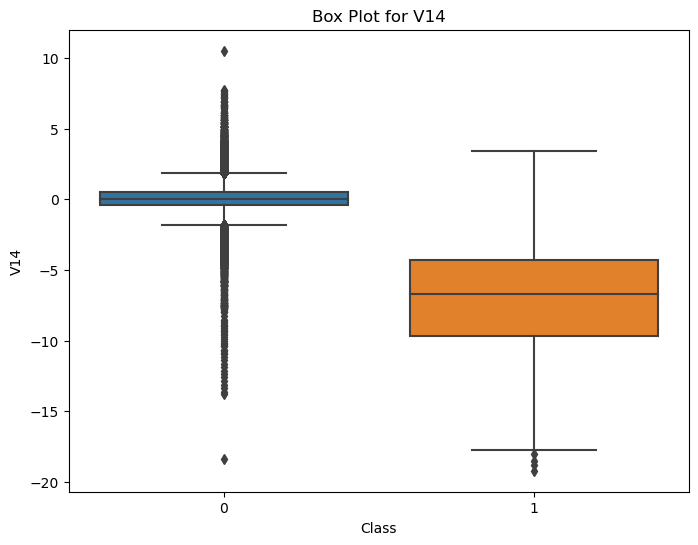

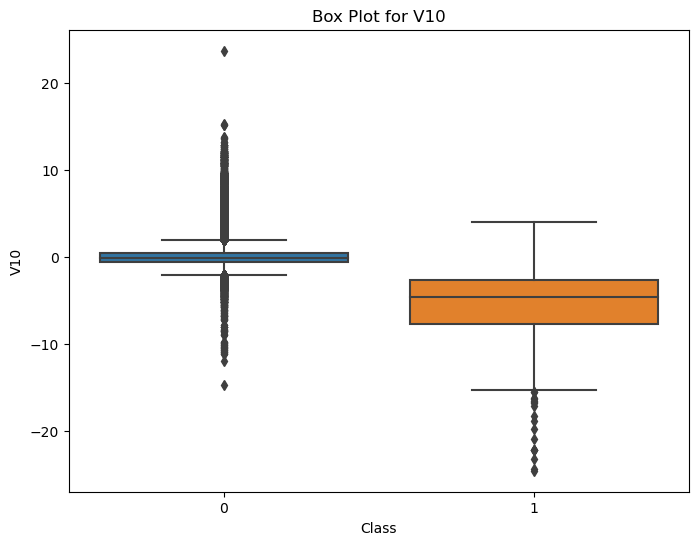

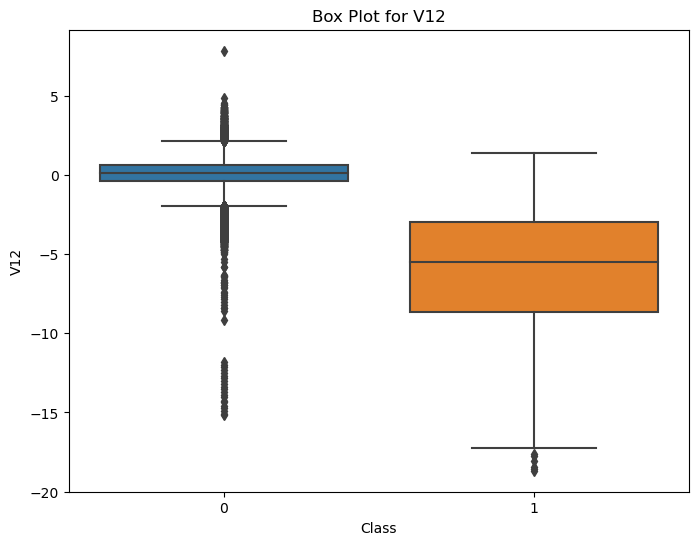

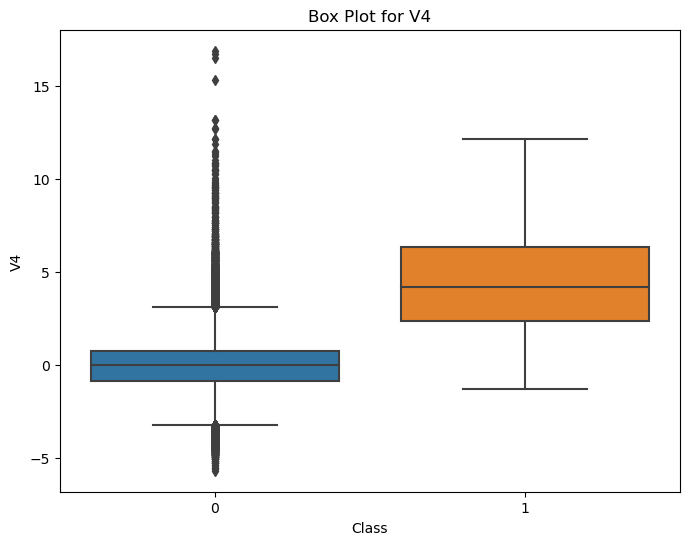

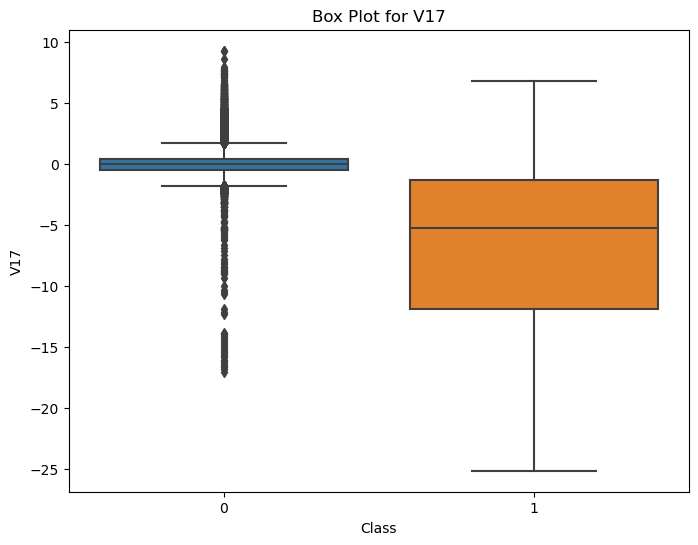

In [46]:
important_features = ['V14', 'V10', 'V12', 'V4', 'V17']

# Create box plots for each important feature
for feature in important_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Class', y=feature, data=data)
    plt.title('Box Plot for {}'.format(feature))
    plt.show()

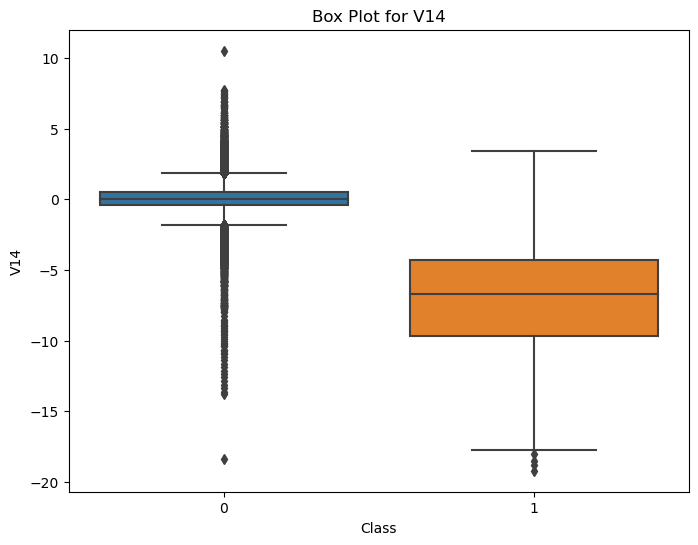

Descriptive Statistics for V14: 
          count      mean       std        min       25%       50%       75%  \
Class                                                                          
0      284315.0  0.012064  0.897007 -18.392091 -0.422453  0.051947  0.494104   
1         492.0 -6.971723  4.278940 -19.214325 -9.692723 -6.729720 -4.282821   

             max  
Class             
0      10.526766  
1       3.442422  


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'feature' is the column you want to visualize
feature = 'V14'  # Replace with your actual feature name
target_variable = 'Class'  # Replace with your actual target variable name

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=target_variable, y=feature, data=data)
plt.title('Box Plot for {}'.format(feature))
plt.show()

# Print key statistics
print("Descriptive Statistics for {}: \n{}".format(feature, data.groupby(target_variable)[feature].describe()))

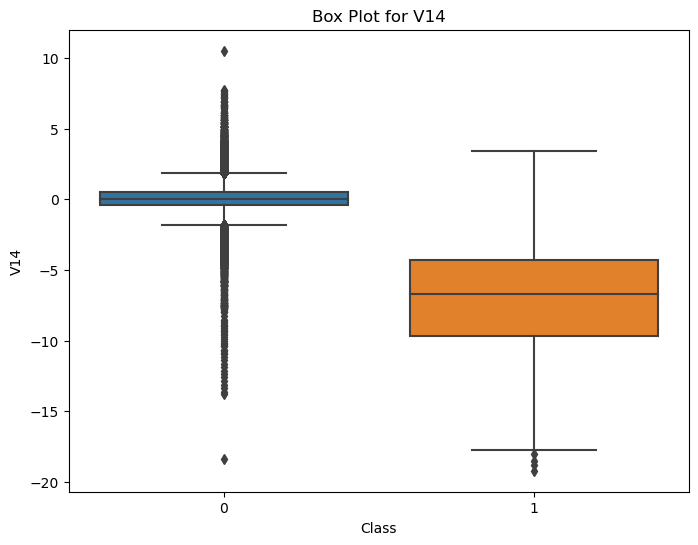

Descriptive Statistics for V14: 
          count      mean       std        min       25%       50%       75%  \
Class                                                                          
0      284315.0  0.012064  0.897007 -18.392091 -0.422453  0.051947  0.494104   
1         492.0 -6.971723  4.278940 -19.214325 -9.692723 -6.729720 -4.282821   

             max  
Class             
0      10.526766  
1       3.442422  


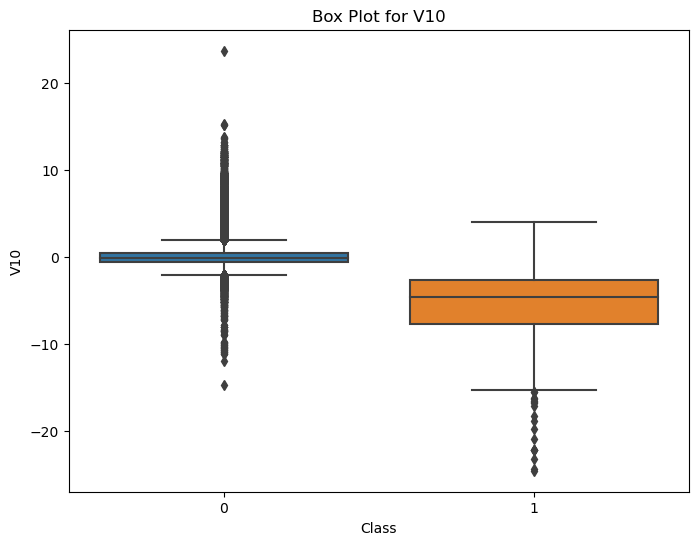

Descriptive Statistics for V10: 
          count      mean       std        min       25%       50%       75%  \
Class                                                                          
0      284315.0  0.009824  1.044204 -14.741096 -0.532880 -0.091872  0.455135   
1         492.0 -5.676883  4.897341 -24.588262 -7.756698 -4.578825 -2.614184   

             max  
Class             
0      23.745136  
1       4.031435  


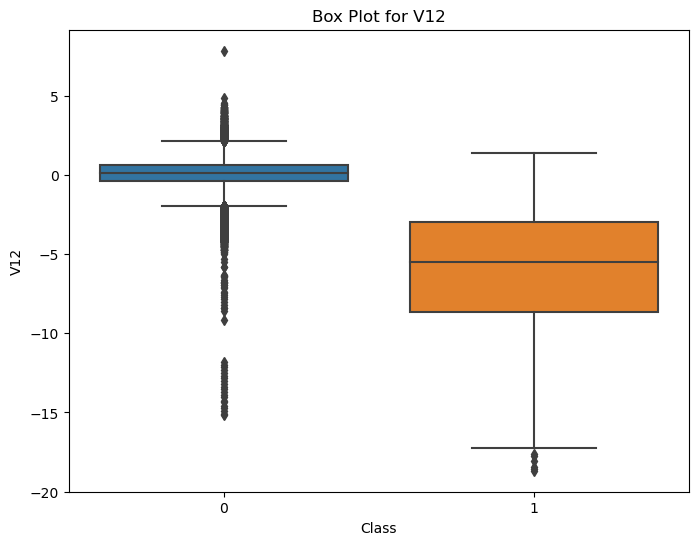

Descriptive Statistics for V12: 
          count      mean       std        min       25%       50%       75%  \
Class                                                                          
0      284315.0  0.010832  0.945939 -15.144988 -0.402102  0.141679  0.619207   
1         492.0 -6.259393  4.654458 -18.683715 -8.688177 -5.502530 -2.974088   

            max  
Class            
0      7.848392  
1      1.375941  


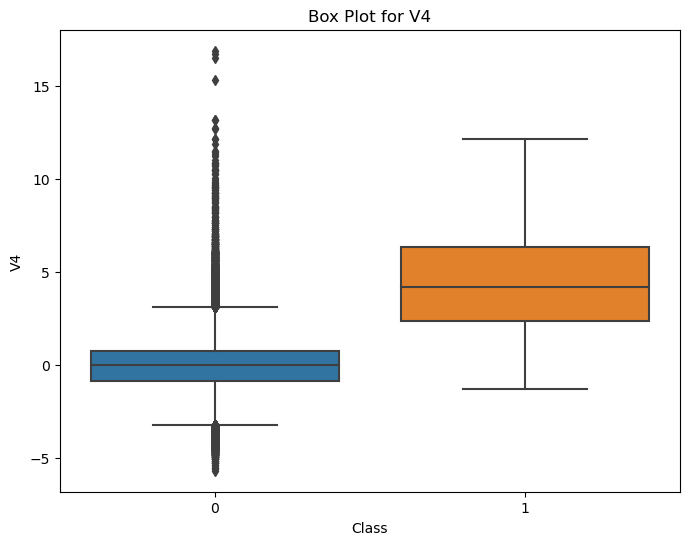

Descriptive Statistics for V4: 
          count      mean       std       min       25%       50%       75%  \
Class                                                                         
0      284315.0 -0.007860  1.399333 -5.683171 -0.850077 -0.022405  0.737624   
1         492.0  4.542029  2.873318 -1.313275  2.373050  4.177147  6.348729   

             max  
Class             
0      16.875344  
1      12.114672  


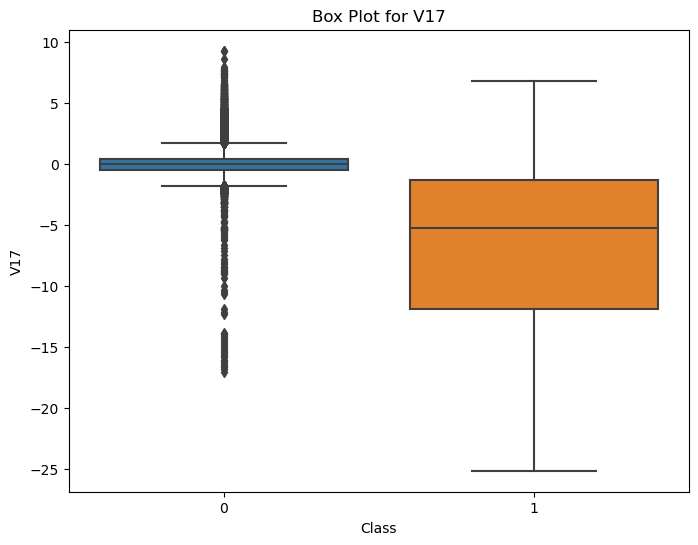

Descriptive Statistics for V17: 
          count      mean       std        min        25%       50%       75%  \
Class                                                                           
0      284315.0  0.011535  0.749457 -17.098444  -0.482644 -0.064833  0.399922   
1         492.0 -6.665836  6.970618 -25.162799 -11.945057 -5.302949 -1.341940   

            max  
Class            
0      9.253526  
1      6.739384  


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

target_variable = 'Class'  
features_to_plot = ['V14', 'V10', 'V12', 'V4', 'V17']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_variable, y=feature, data=data)
    plt.title('Box Plot for {}'.format(feature))
    plt.show()

    print("Descriptive Statistics for {}: \n{}".format(feature, data.groupby(target_variable)[feature].describe()))

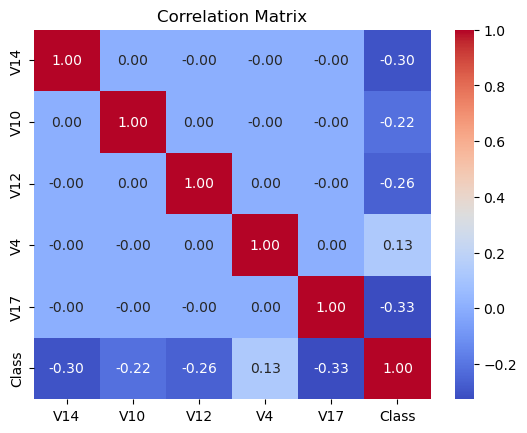

In [54]:
correlation_matrix = data[['V14', 'V10', 'V12', 'V4', 'V17', 'Class']].corr()

# Heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [55]:
# Calculate correlation of 'Class' with other features
class_correlation = data[['V14', 'V10', 'V12', 'V4', 'V17', 'Class']].corr()['Class']

# Print the correlation values
print("Correlation of 'Class' with other features:")
print(class_correlation)

Correlation of 'Class' with other features:
V14     -0.302544
V10     -0.216883
V12     -0.260593
V4       0.133447
V17     -0.326481
Class    1.000000
Name: Class, dtype: float64


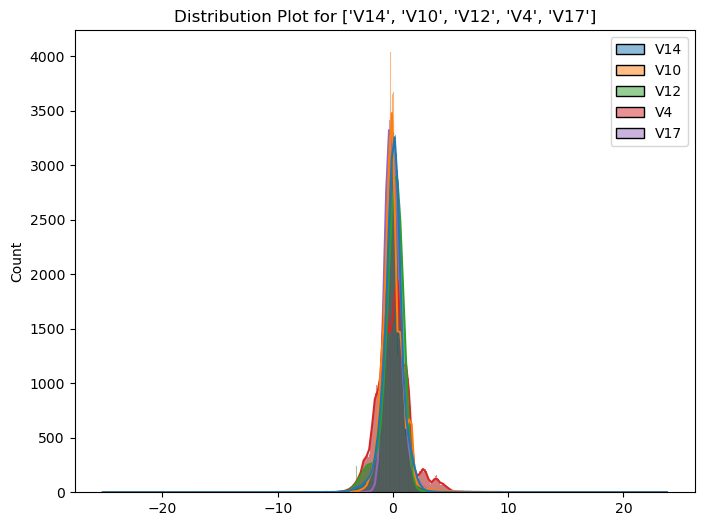

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
feature = ['V14', 'V10', 'V12', 'V4', 'V17']

plt.figure(figsize=(8, 6))
sns.histplot(data[feature], kde=True)
plt.title('Distribution Plot for {}'.format(feature))
plt.show()

In [60]:
import scipy.stats as stats

# Example data (replace with your actual data)
fraudulent_amounts = data[data['Class'] == 1]['Amount']
non_fraudulent_amounts = data[data['Class'] == 0]['Amount']

# t-test
t_stat, p_value = stats.ttest_ind(fraudulent_amounts, non_fraudulent_amounts)

# significance level
alpha = 0.05

#decision
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

Reject the null hypothesis. There is evidence of a significant difference.


In [39]:
!pip install Flask

In [40]:
import os

# Print the current working directory
current_directory = os.getcwd()
print(f"Current Working Directory: {current_directory}")

# Print the list of files in the current directory
file_list = os.listdir(current_directory)
print(f"Files in Current Directory: {file_list}")

Current Working Directory: C:\Users\priya\Desktop\DataScience\CreditCard
Files in Current Directory: ['.ipynb_checkpoints', 'app.py', 'app.py.ipynb', 'CreditCard', 'creditcard.csv', 'CreditCardFraudPrediction.ipynb', 'random_forest_model.joblib', 'venv']


In [ ]:
model = joblib.load('random_forest_model.joblib')

In [42]:
import os

# Get the current working directory
current_directory = os.getcwd()

# List all files in the current directory
files_in_directory = os.listdir(current_directory)

# Print the list of files
print("Files in Current Directory:", files_in_directory)

Files in Current Directory: ['.ipynb_checkpoints', 'app.py', 'app.py.ipynb', 'CreditCard', 'creditcard.csv', 'CreditCardFraudPrediction.ipynb', 'random_forest_model.joblib', 'venv']


In [44]:
import os

# Display files in the current directory
current_directory = os.getcwd()
files_in_directory = os.listdir(current_directory)

# Print the list of files
files_in_directory

['.ipynb_checkpoints',
 'app.py',
 'app.py.ipynb',
 'CreditCard',
 'creditcard.csv',
 'CreditCardFraudPrediction.ipynb',
 'random_forest_model.joblib',
 'venv']

In [46]:
import joblib

# Assuming 'model' is your trained RandomForestClassifier
model_path = 'random_forest_model.joblib'
joblib.dump(model, model_path)

['random_forest_model.joblib']

In [47]:
model_path = 'random_forest_model.joblib'

In [48]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load the trained model
model_path = 'random_forest_model.joblib'
model = joblib.load(model_path)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input data from the request
        data = request.get_json(force=True)
        # Assuming 'features' is the key for input features
        features = data['features']
        # Convert features to numpy array
        features = np.array(features).reshape(1, -1)
        
        # Make predictions
        prediction = model.predict(features)
        
        # Prepare the response
        response = {'prediction': int(prediction[0])}
        
        return jsonify(response)

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(port=5000, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\priya\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [49]:
!pip install Flask
!pip install joblib

In [51]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [52]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already trained and have 'model' object
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Save the model with the current scikit-learn version
joblib.dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [56]:
pip install --upgrade scikit-learn

  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Load the model (adjust the path accordingly)
model_path = 'random_forest_model.joblib'
model = RandomForestClassifier(random_state=42)

# Assuming X_resampled, y_resampled are your training data
model.fit(X_resampled, y_resampled)

# Save the model with the current scikit-learn version
joblib.dump(model, model_path)

NameError: name 'X_resampled' is not defined

In [53]:
conda activate myenv


Note: you may need to restart the kernel to use updated packages.


In [54]:
conda install scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\priya\anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2023.11.~ --> pkgs/main::ca-certificates-2023.12.12-haa95532_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2023.11.1~ --> pkgs/main/win-64::certifi-2023.11.17-py311haa95532_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [55]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Load the model (adjust the path accordingly)
model_path = 'random_forest_model.joblib'
model = joblib.load(model_path)

# Save the model with the current scikit-learn version
joblib.dump(model, model_path)

['random_forest_model.joblib']

In [ ]:
import os
os._exit(00)

In [5]:
import os

In [8]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import joblib

model_path = 'random_forest_model.joblib'
joblib.dump(model, model_path)

['random_forest_model.joblib']

In [10]:
model_path = 'random_forest_model.joblib'
model = joblib.load(model_path)

In [11]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')  # Assuming you have an 'index.html' file in your 'Templates' folder

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1